In [15]:
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [16]:
x, y = make_classification(n_features=2,n_redundant=0,n_informative=2, n_clusters_per_class=1,random_state=42)
x += 1.2 * np.random.uniform(size = x.shape)
xy = (x, y)

In [17]:
#x.shape

In [18]:
#plt.scatter(x[:, 0],x[:, 1],c=y)

In [19]:
#x, y = make_moons(noise=0.2,random_state=42)

In [20]:
#plt.scatter(x[:, 0],x[:, 1],c=y)

In [21]:
#x, y = make_circles(noise=0.1,factor=0.3,random_state=42)

In [22]:
#plt.scatter(x[:, 0],x[:, 1],c=y)

In [23]:
datasets = [xy,
            make_moons(noise=0.2,random_state=42),
            make_circles(noise=0.1,factor=0.3,random_state=42)]

In [24]:
fig = plt.figure(figsize=(6,9))
i = 1

<Figure size 600x900 with 0 Axes>

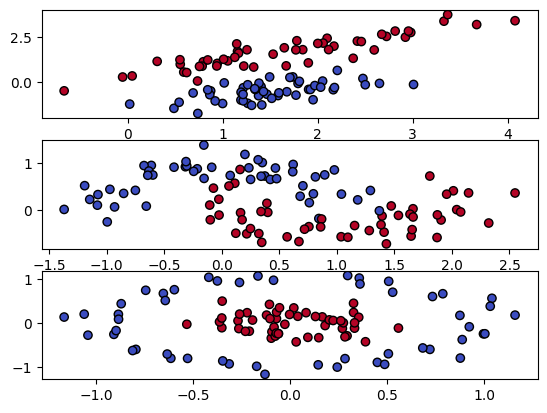

In [25]:
for ds_cnt, ds in enumerate(datasets):
    x, y = ds
    if ds_cnt == 0:
        colors = "darkred"
    elif ds_cnt == 1:
        colors = "darkblue"
    else:
        colors = "darkgreen"
    ax = plt.subplot(len(datasets),1,i)
    ax.scatter(x[:, 0],x[:, 1],c = y,cmap = plt.cm.coolwarm,edgecolors="black")
    i+=1

In [26]:
plt.show()

In [27]:
names = ["Nearest Neightbors", "Linear SVM", "Decision Tree", "Random Forest", "Naive Bayes"]

classifiers = [KNeighborsClassifier(),
               SVC(),
               DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB()]

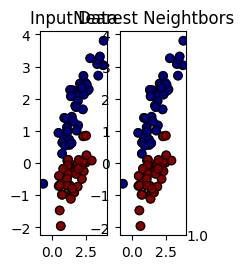

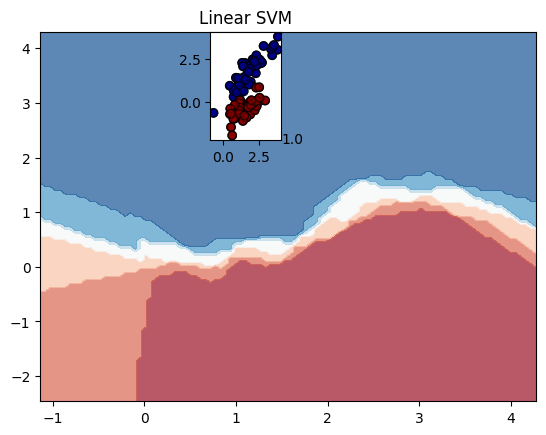

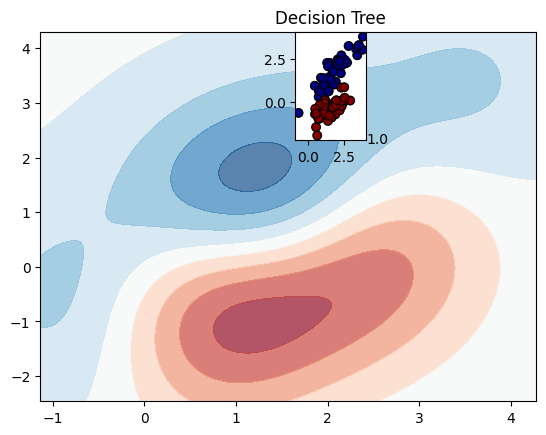

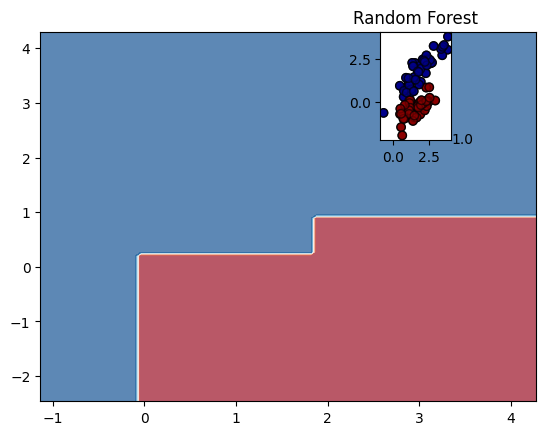

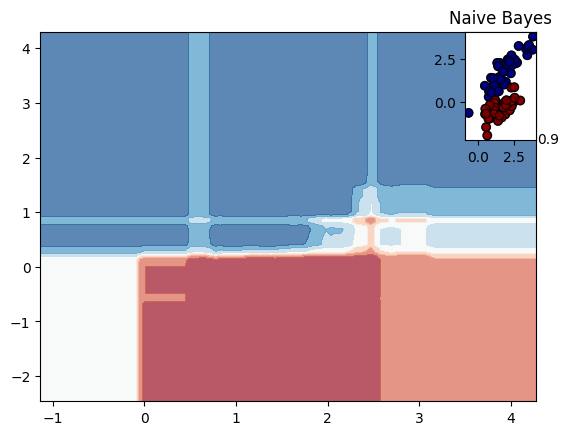

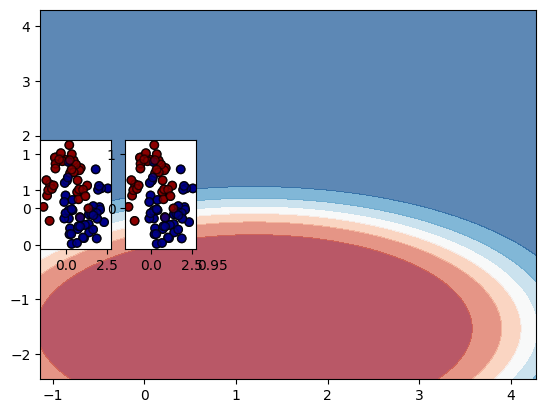

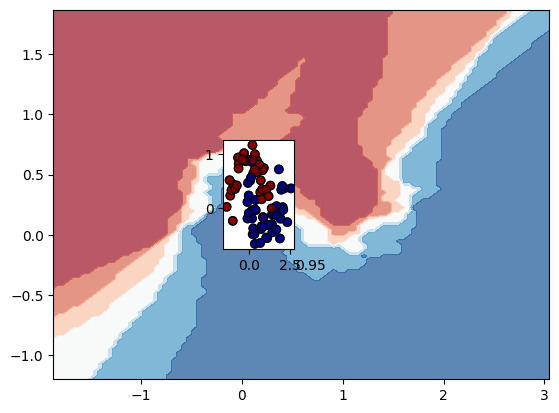

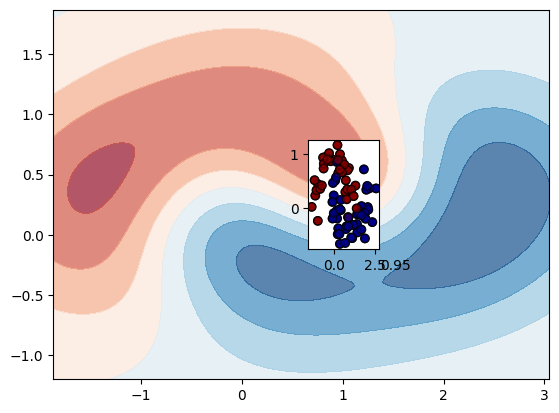

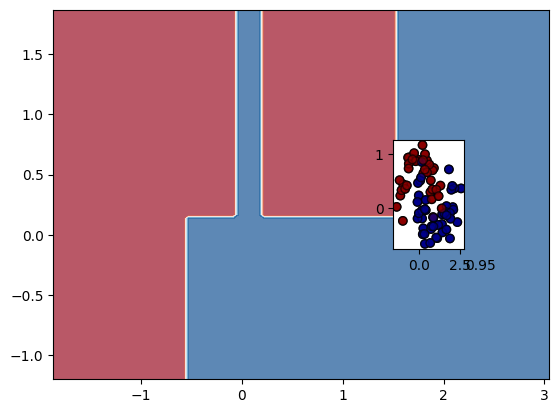

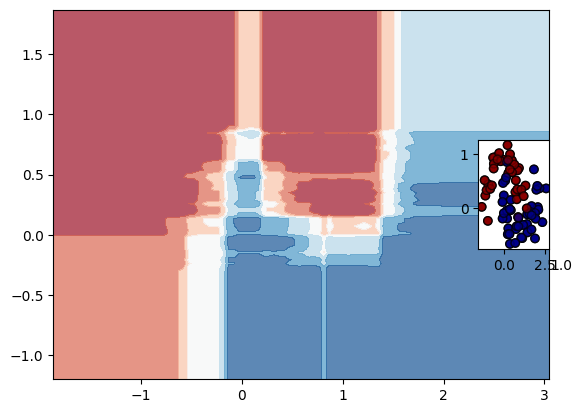

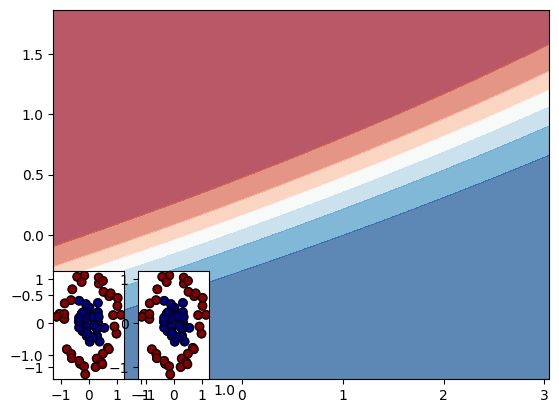

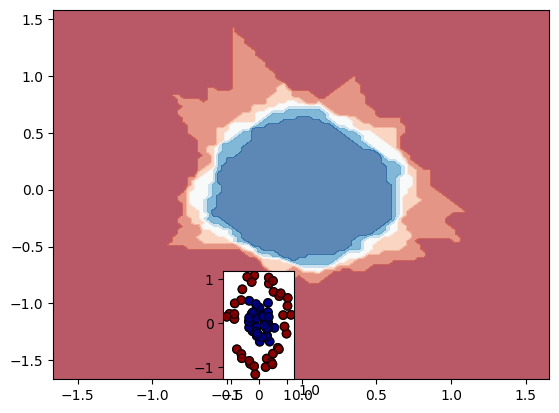

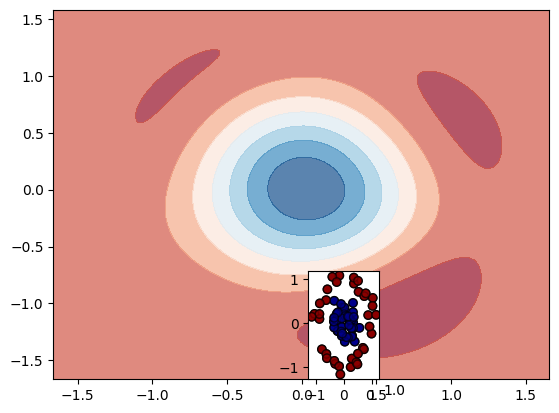

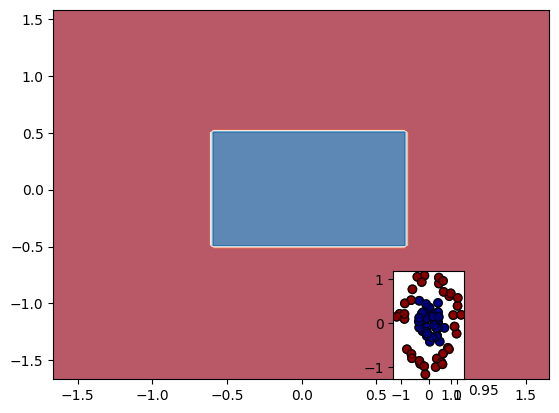

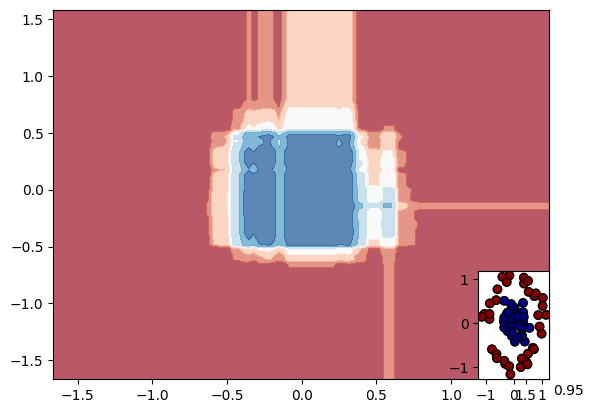

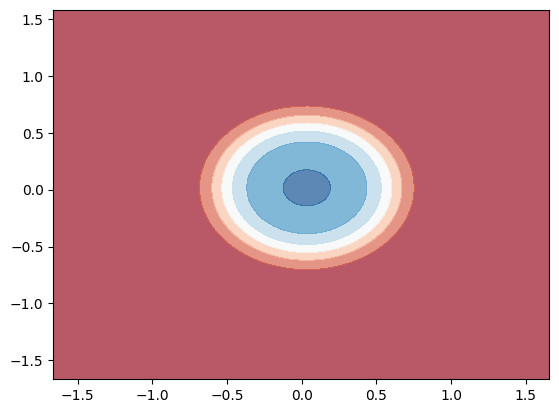

In [14]:
fig = plt.figure(figsize=(6,9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    x, y = ds
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    cm_bright = ListedColormap(["darkred","darkblue"])
    ax = plt.subplot(len(datasets),len(classifiers) + 1,i)
    if ds_cnt == 0:
        ax.set_title("Input Data")

    # plot training data
    ax.scatter(x_train[:,0],x_train[:,1], c = y_train, cmap = cm_bright, edgecolors= "black")

    # plot test data
    ax.scatter(x_train[:,0],x_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "black", alpha = 0.6)

    i += 1

    for name, clf in zip(names,classifiers):
        ax = plt.subplot(len(datasets), len(classifiers)+1,i)

        clf = make_pipeline(StandardScaler(),clf)
        clf.fit(x_train,y_train)
        score = clf.score(x_test,y_test)
        DecisionBoundaryDisplay.from_estimator(clf,x,cmap = plt.cm.RdBu,alpha= 0.7,eps = 0.5)

        # plot training data
        ax.scatter(x_train[:,0],x_train[:,1], c = y_train, cmap = cm_bright, edgecolors= "black")
    
        # plot test data
        ax.scatter(x_train[:,0],x_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "black", alpha = 0.6)

        if ds_cnt == 0:
            ax.set_title(name)

        ax.text(
            x[:,0].max() + 0.25,
            x[:,1].min() - 0.45,
            str(score))

        i += 1